# Lab session 11: K Nearest Neighbours (KNN)
__Name: Anthra Makesh<br>
Registration number: 19BCE1681<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 08-November-2021 Monday__<br><br>
    
Topic:<br>
KNN and Weighted KNN classifier.

### Libraries

In [17]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randint

### Generate a dataset

In [18]:
seed(10)
f1 = randint(0, 20, 30)
f2 = randint(0, 20, 30)
label = randint(1, 3, 30)
dataset = pd.DataFrame({'f1':f1, 'f2':f2, 'label':label})
dataset

,f1,f2,label
0,9,12,2
1,4,1,1
2,15,4,1
3,0,18,2
4,17,13,1
5,16,11,1
6,17,10,2
7,8,9,1
8,9,15,1
9,0,18,1


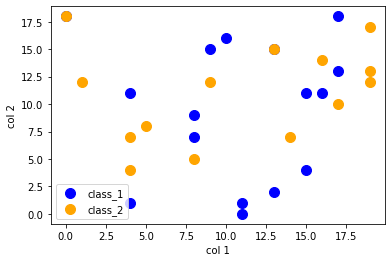

In [22]:
plt.scatter(np.array(dataset[dataset.iloc[:,-1] == 1].iloc[:,0]), np.array(dataset[dataset.iloc[:,-1] == 1].iloc[:,1]), marker='o', label='class_1', s=100, c="blue")
plt.scatter(np.array(dataset[dataset.iloc[:,-1] == 2].iloc[:,0]), np.array(dataset[dataset.iloc[:,-1] == 2].iloc[:,1]), marker='o', label='class_2', s=100,c="orange")
plt.xlabel('col 1')
plt.ylabel('col 2')
plt.legend()
plt.show()

### Functions needed for classification

In [23]:
def euclidean_distance(c1, c2):
    return np.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)

In [34]:
def visualise(test_data, knn, dataset):
    plt.scatter(np.array(dataset[dataset.iloc[:,-1] == 1].iloc[:,0]), np.array(dataset[dataset.iloc[:,-1] == 1].iloc[:,1]), marker='o', label='class_1', alpha=0.3, s=100, c="blue")
    plt.scatter(np.array(dataset[dataset.iloc[:,-1] == 2].iloc[:,0]), np.array(dataset[dataset.iloc[:,-1] == 2].iloc[:,1]), marker='o', label='class_2', alpha=0.3, s=100, c="orange")
    x = []
    y = []
    for i in range(len(knn)):
        x.append(knn[i][0][0])
        y.append(knn[i][0][1])
        plt.plot([test_data[0], knn[i][0][0]], [test_data[1], knn[i][0][1]], c="black")
    plt.scatter(np.array(x), np.array(y), marker='*', label='nearest-neighbours', c="red")
    plt.scatter(np.array(test_data[0]), np.array(test_data[1]), marker='+', label='test data', c="green", s=204)
    plt.xlabel('col 1')
    plt.ylabel('col 2')
    plt.legend()
    plt.show()

In [35]:
def nearest_neighbours(test_data, data):
    cn = list()
    for i in range(len(data)):
        cn.append((data[i], euclidean_distance(test_data, data[i])))
    cn.sort(key=lambda li: li[1])
    return cn

<hr>

### Classifiers to perform:
KNN and Weighted KNN classification with the test data = [6,12]<br>
and k values as 
k = [7,9,11,13,17,19,23,24,25,29]<br>

In [26]:
k_values = [7,9,11,13,17,19,23,24,25,29]
test_data = [6,12]

<hr>

#### <div id="KNN">1) K Nearest Neighbours classifier</div>

In [36]:
def KNN_prediction(test_data, dataset, k):
    train_data = dataset.values.tolist()
    knn = nearest_neighbours(test_data, train_data)[0:k]
    visualise(test_data, knn, dataset)
    label_class = []
    for i in range(len(knn)):
        label_class.append(knn[i][0][-1])
    predicted_class = max(set(label_class), key=label_class.count)
    print(label_class)
    print(f"\nPrediction class (label) = {predicted_class}.")
    return predicted_class

__KNN Classification__

K = 7:



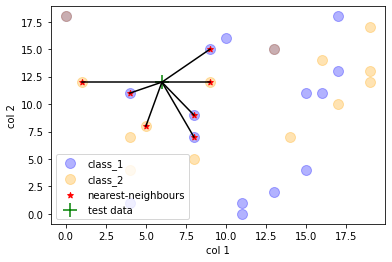

[1, 2, 1, 2, 1, 2, 1]

Prediction class (label) = 1.
 (Blue)
----------------------------------------------------------------------------------------------------
K = 9:



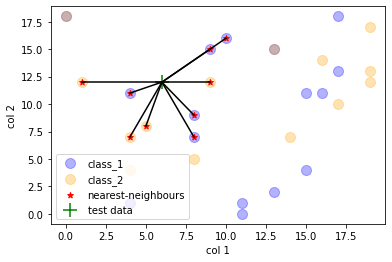

[1, 2, 1, 2, 1, 2, 1, 2, 1]

Prediction class (label) = 1.
 (Blue)
----------------------------------------------------------------------------------------------------
K = 11:



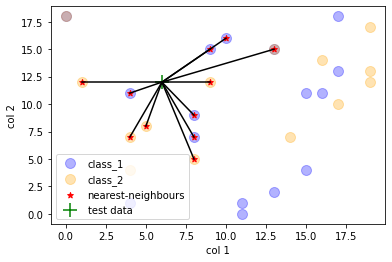

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2]

Prediction class (label) = 2.
 (Orange)
----------------------------------------------------------------------------------------------------
K = 13:



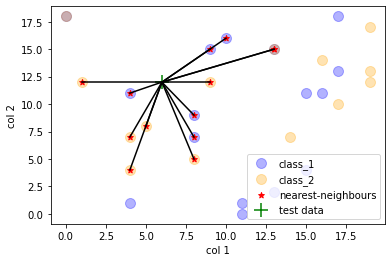

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2]

Prediction class (label) = 2.
 (Orange)
----------------------------------------------------------------------------------------------------
K = 17:



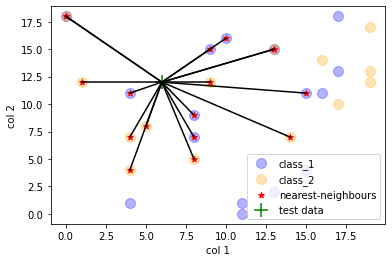

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2]

Prediction class (label) = 2.
 (Orange)
----------------------------------------------------------------------------------------------------
K = 19:



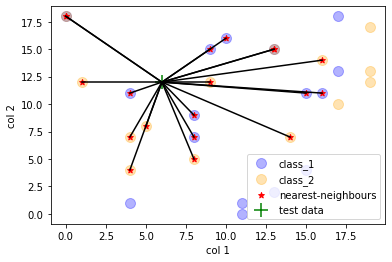

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2]

Prediction class (label) = 2.
 (Orange)
----------------------------------------------------------------------------------------------------
K = 23:



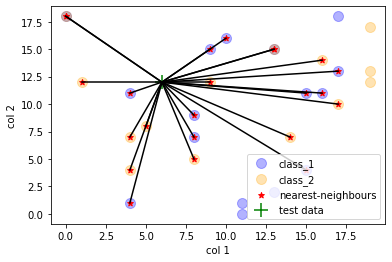

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1]

Prediction class (label) = 1.
 (Blue)
----------------------------------------------------------------------------------------------------
K = 24:



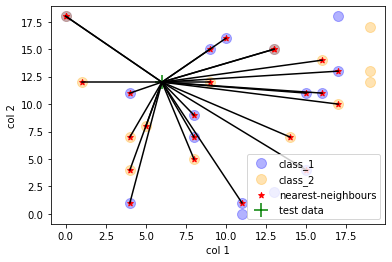

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1]

Prediction class (label) = 1.
 (Blue)
----------------------------------------------------------------------------------------------------
K = 25:



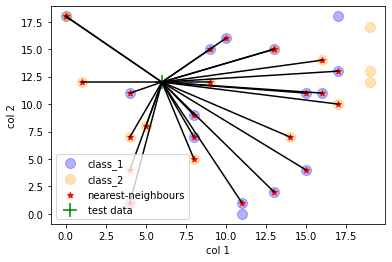

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1]

Prediction class (label) = 1.
 (Blue)
----------------------------------------------------------------------------------------------------
K = 29:



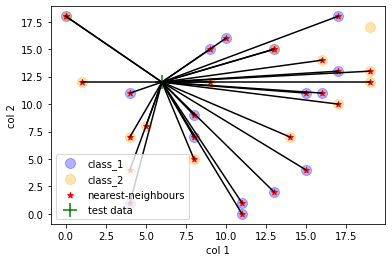

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2]

Prediction class (label) = 1.
 (Blue)
----------------------------------------------------------------------------------------------------


In [37]:
for k in k_values:
    print(f"K = {k}:\n")
    prediction = KNN_prediction(test_data, dataset, k)
    if prediction == 1:
        print("(Blue)")
    else:
        print("(Orange)")
    print("--"*50)

<hr>

#### <div id="Weighted_KNN">2) Weighted KNN</div>

In [42]:
def weighted_knn(test_data, dataset, k):
    train_data = train_data = dataset.values.tolist()
    knn = nearest_neighbours(test_data, train_data)[0:k]
    visualise(test_data, knn, dataset)
    w1 = 0 
    w2 = 0 
    for i in range(len(knn)):
        Eucl_dist = knn[i][1]
        wn = 1/(Eucl_dist)        
        cn = knn[i][0][-1]
        if cn == 1:
            w1 += (wn)
        elif cn == 2: 
            w2 += (wn)
    if w1 > w2:
        predicted_class = 1
    else:
        predicted_class = 2
    print("The sum of weights: ")
    print(f"class_1 = {w1} \t class_2 = {w2}")
    print(f"\nPrediction class (label) = {predicted_class}.")
    return predicted_class

__Weighted KNN Classification__

K = 7:



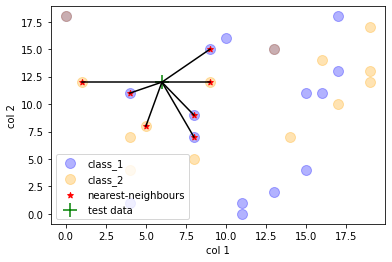

The sum of weights: 
class_1 = 1.1459612921851403 	 class_2 = 0.7758689583696663

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 9:



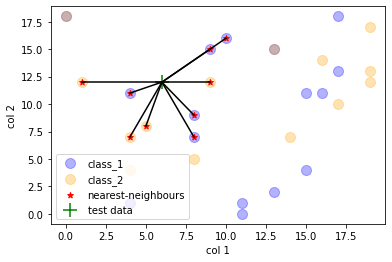

The sum of weights: 
class_1 = 1.3227379874817773 	 class_2 = 0.9615642965467182

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 11:



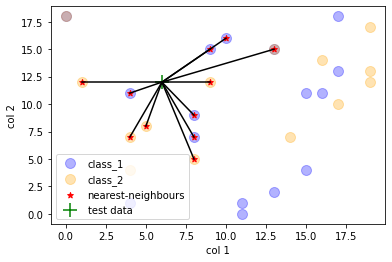

The sum of weights: 
class_1 = 1.3227379874817773 	 class_2 = 1.2302312933551298

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 13:



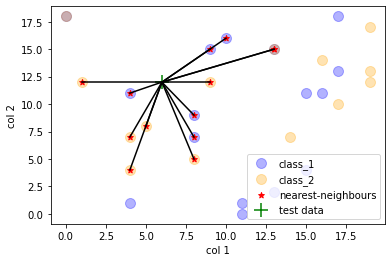

The sum of weights: 
class_1 = 1.4540444203415 	 class_2 = 1.3514991058732964

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 17:



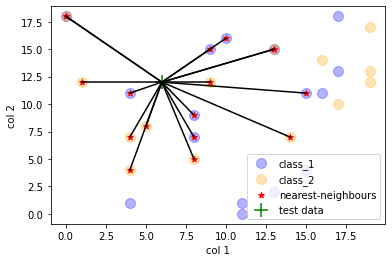

The sum of weights: 
class_1 = 1.6823270766141043 	 class_2 = 1.5753500240716902

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 19:



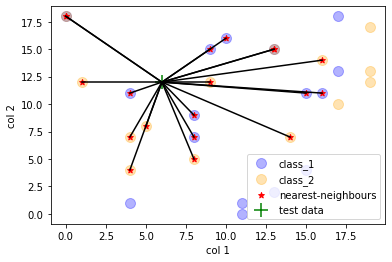

The sum of weights: 
class_1 = 1.7818307956351032 	 class_2 = 1.6734080916407823

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 23:



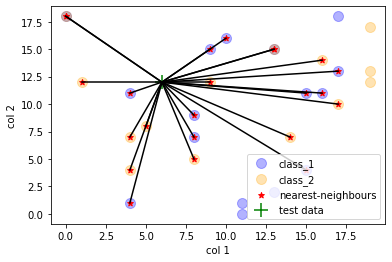

The sum of weights: 
class_1 = 2.044854740631353 	 class_2 = 1.7628508107407739

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 24:



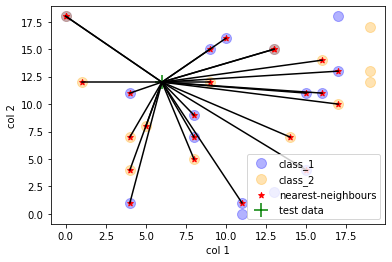

The sum of weights: 
class_1 = 2.12761532949159 	 class_2 = 1.7628508107407739

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 25:



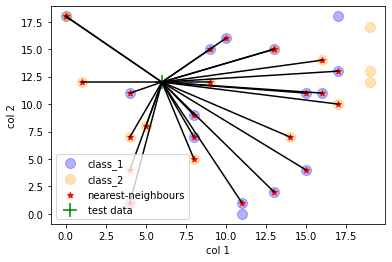

The sum of weights: 
class_1 = 2.209538521543494 	 class_2 = 1.7628508107407739

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------
K = 29:



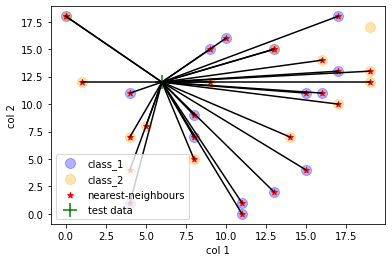

The sum of weights: 
class_1 = 2.366270286913333 	 class_2 = 1.9164703865485877

Prediction class (label) = 1.
(Blue)
----------------------------------------------------------------------------------------------------


In [43]:
for k in k_values:
    print(f"K = {k}:\n")
    prediction = weighted_knn(test_data, dataset, k)
    if prediction == 1:
        print("(Blue)")
    else:
        print("(Orange)")
    print("--"*50)

The sum of weight of class blue is greater than the sum of weight of class orange for all the values of K as shown above. Hence, the predicted class is <strong>class = 1 (Blue)</strong>

Weighted KNN gives more consistent prediction as <strong>class = 1 (Blue circle)</strong>.

<hr>